# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
from datetime import datetime as dt

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
#len(cities)
len(cities)

595

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = "Imperial"
query_url = f"{url}appid={api_key}&units={units}&q="

city_name = []
city_lat = []
city_lon = []
city_temp = []
city_humid = []
city_clouds = []
city_wind = []

counter = 0
for city in cities:
    counter += 1
    response = requests.get(query_url + city).json()
    if response['cod'] == '404':
        continue
    else:
        city_lat.append(response["coord"]["lat"])
        city_lon.append(response["coord"]["lon"])
        city_temp.append(response["main"]["temp_max"])
        city_humid.append(response["main"]["humidity"])
        city_clouds.append(response["clouds"]["all"])
        city_wind.append(response["wind"]["speed"])
        city_name.append(response["name"])
        print(f'Processing Record {counter} of Set | {city}')
        print(f'{query_url}+{city}')

print('-----------------------------------------------')
print('Data Retrieval Complete')          
print('-----------------------------------------------')

Processing Record 1 of Set | makaryev
http://api.openweathermap.org/data/2.5/weather?appid=2c1434d35e9629b820e1e7c9ff7c7942&units=Imperial&q=+makaryev
Processing Record 2 of Set | fangshan
http://api.openweathermap.org/data/2.5/weather?appid=2c1434d35e9629b820e1e7c9ff7c7942&units=Imperial&q=+fangshan
Processing Record 3 of Set | itaituba
http://api.openweathermap.org/data/2.5/weather?appid=2c1434d35e9629b820e1e7c9ff7c7942&units=Imperial&q=+itaituba
Processing Record 4 of Set | bitung
http://api.openweathermap.org/data/2.5/weather?appid=2c1434d35e9629b820e1e7c9ff7c7942&units=Imperial&q=+bitung
Processing Record 5 of Set | tobol
http://api.openweathermap.org/data/2.5/weather?appid=2c1434d35e9629b820e1e7c9ff7c7942&units=Imperial&q=+tobol
Processing Record 6 of Set | belaya gora
http://api.openweathermap.org/data/2.5/weather?appid=2c1434d35e9629b820e1e7c9ff7c7942&units=Imperial&q=+belaya gora
Processing Record 7 of Set | severo-kurilsk
http://api.openweathermap.org/data/2.5/weather?appid=2

Processing Record 60 of Set | ayan
http://api.openweathermap.org/data/2.5/weather?appid=2c1434d35e9629b820e1e7c9ff7c7942&units=Imperial&q=+ayan
Processing Record 61 of Set | nyakahanga
http://api.openweathermap.org/data/2.5/weather?appid=2c1434d35e9629b820e1e7c9ff7c7942&units=Imperial&q=+nyakahanga
Processing Record 62 of Set | qaanaaq
http://api.openweathermap.org/data/2.5/weather?appid=2c1434d35e9629b820e1e7c9ff7c7942&units=Imperial&q=+qaanaaq
Processing Record 63 of Set | cape town
http://api.openweathermap.org/data/2.5/weather?appid=2c1434d35e9629b820e1e7c9ff7c7942&units=Imperial&q=+cape town
Processing Record 64 of Set | arraial do cabo
http://api.openweathermap.org/data/2.5/weather?appid=2c1434d35e9629b820e1e7c9ff7c7942&units=Imperial&q=+arraial do cabo
Processing Record 65 of Set | kato milea
http://api.openweathermap.org/data/2.5/weather?appid=2c1434d35e9629b820e1e7c9ff7c7942&units=Imperial&q=+kato milea
Processing Record 66 of Set | college
http://api.openweathermap.org/data/2

Processing Record 118 of Set | dikson
http://api.openweathermap.org/data/2.5/weather?appid=2c1434d35e9629b820e1e7c9ff7c7942&units=Imperial&q=+dikson
Processing Record 119 of Set | hasaki
http://api.openweathermap.org/data/2.5/weather?appid=2c1434d35e9629b820e1e7c9ff7c7942&units=Imperial&q=+hasaki
Processing Record 120 of Set | esperance
http://api.openweathermap.org/data/2.5/weather?appid=2c1434d35e9629b820e1e7c9ff7c7942&units=Imperial&q=+esperance
Processing Record 121 of Set | bridgwater
http://api.openweathermap.org/data/2.5/weather?appid=2c1434d35e9629b820e1e7c9ff7c7942&units=Imperial&q=+bridgwater
Processing Record 124 of Set | nioro
http://api.openweathermap.org/data/2.5/weather?appid=2c1434d35e9629b820e1e7c9ff7c7942&units=Imperial&q=+nioro
Processing Record 125 of Set | port hardy
http://api.openweathermap.org/data/2.5/weather?appid=2c1434d35e9629b820e1e7c9ff7c7942&units=Imperial&q=+port hardy
Processing Record 126 of Set | dashitou
http://api.openweathermap.org/data/2.5/weather

Processing Record 176 of Set | kodiak
http://api.openweathermap.org/data/2.5/weather?appid=2c1434d35e9629b820e1e7c9ff7c7942&units=Imperial&q=+kodiak
Processing Record 177 of Set | tiksi
http://api.openweathermap.org/data/2.5/weather?appid=2c1434d35e9629b820e1e7c9ff7c7942&units=Imperial&q=+tiksi
Processing Record 179 of Set | saulkrasti
http://api.openweathermap.org/data/2.5/weather?appid=2c1434d35e9629b820e1e7c9ff7c7942&units=Imperial&q=+saulkrasti
Processing Record 180 of Set | buin
http://api.openweathermap.org/data/2.5/weather?appid=2c1434d35e9629b820e1e7c9ff7c7942&units=Imperial&q=+buin
Processing Record 181 of Set | nome
http://api.openweathermap.org/data/2.5/weather?appid=2c1434d35e9629b820e1e7c9ff7c7942&units=Imperial&q=+nome
Processing Record 182 of Set | husavik
http://api.openweathermap.org/data/2.5/weather?appid=2c1434d35e9629b820e1e7c9ff7c7942&units=Imperial&q=+husavik
Processing Record 183 of Set | aklavik
http://api.openweathermap.org/data/2.5/weather?appid=2c1434d35e9629

Processing Record 237 of Set | praia da vitoria
http://api.openweathermap.org/data/2.5/weather?appid=2c1434d35e9629b820e1e7c9ff7c7942&units=Imperial&q=+praia da vitoria
Processing Record 238 of Set | tokur
http://api.openweathermap.org/data/2.5/weather?appid=2c1434d35e9629b820e1e7c9ff7c7942&units=Imperial&q=+tokur
Processing Record 239 of Set | okhotsk
http://api.openweathermap.org/data/2.5/weather?appid=2c1434d35e9629b820e1e7c9ff7c7942&units=Imperial&q=+okhotsk
Processing Record 240 of Set | arman
http://api.openweathermap.org/data/2.5/weather?appid=2c1434d35e9629b820e1e7c9ff7c7942&units=Imperial&q=+arman
Processing Record 241 of Set | warrnambool
http://api.openweathermap.org/data/2.5/weather?appid=2c1434d35e9629b820e1e7c9ff7c7942&units=Imperial&q=+warrnambool
Processing Record 242 of Set | mirante do paranapanema
http://api.openweathermap.org/data/2.5/weather?appid=2c1434d35e9629b820e1e7c9ff7c7942&units=Imperial&q=+mirante do paranapanema
Processing Record 244 of Set | cayenne
http:

Processing Record 296 of Set | sagua la grande
http://api.openweathermap.org/data/2.5/weather?appid=2c1434d35e9629b820e1e7c9ff7c7942&units=Imperial&q=+sagua la grande
Processing Record 297 of Set | baghdad
http://api.openweathermap.org/data/2.5/weather?appid=2c1434d35e9629b820e1e7c9ff7c7942&units=Imperial&q=+baghdad
Processing Record 298 of Set | souillac
http://api.openweathermap.org/data/2.5/weather?appid=2c1434d35e9629b820e1e7c9ff7c7942&units=Imperial&q=+souillac
Processing Record 299 of Set | torbay
http://api.openweathermap.org/data/2.5/weather?appid=2c1434d35e9629b820e1e7c9ff7c7942&units=Imperial&q=+torbay
Processing Record 300 of Set | nantucket
http://api.openweathermap.org/data/2.5/weather?appid=2c1434d35e9629b820e1e7c9ff7c7942&units=Imperial&q=+nantucket
Processing Record 301 of Set | dakar
http://api.openweathermap.org/data/2.5/weather?appid=2c1434d35e9629b820e1e7c9ff7c7942&units=Imperial&q=+dakar
Processing Record 302 of Set | inirida
http://api.openweathermap.org/data/2.5/

Processing Record 354 of Set | port hedland
http://api.openweathermap.org/data/2.5/weather?appid=2c1434d35e9629b820e1e7c9ff7c7942&units=Imperial&q=+port hedland
Processing Record 355 of Set | tulum
http://api.openweathermap.org/data/2.5/weather?appid=2c1434d35e9629b820e1e7c9ff7c7942&units=Imperial&q=+tulum
Processing Record 356 of Set | pundaguitan
http://api.openweathermap.org/data/2.5/weather?appid=2c1434d35e9629b820e1e7c9ff7c7942&units=Imperial&q=+pundaguitan
Processing Record 357 of Set | flinders
http://api.openweathermap.org/data/2.5/weather?appid=2c1434d35e9629b820e1e7c9ff7c7942&units=Imperial&q=+flinders
Processing Record 358 of Set | atasu
http://api.openweathermap.org/data/2.5/weather?appid=2c1434d35e9629b820e1e7c9ff7c7942&units=Imperial&q=+atasu
Processing Record 359 of Set | westport
http://api.openweathermap.org/data/2.5/weather?appid=2c1434d35e9629b820e1e7c9ff7c7942&units=Imperial&q=+westport
Processing Record 360 of Set | eenhana
http://api.openweathermap.org/data/2.5/we

Processing Record 410 of Set | katobu
http://api.openweathermap.org/data/2.5/weather?appid=2c1434d35e9629b820e1e7c9ff7c7942&units=Imperial&q=+katobu
Processing Record 412 of Set | versalles
http://api.openweathermap.org/data/2.5/weather?appid=2c1434d35e9629b820e1e7c9ff7c7942&units=Imperial&q=+versalles
Processing Record 413 of Set | pisco
http://api.openweathermap.org/data/2.5/weather?appid=2c1434d35e9629b820e1e7c9ff7c7942&units=Imperial&q=+pisco
Processing Record 414 of Set | haines junction
http://api.openweathermap.org/data/2.5/weather?appid=2c1434d35e9629b820e1e7c9ff7c7942&units=Imperial&q=+haines junction
Processing Record 416 of Set | clarence town
http://api.openweathermap.org/data/2.5/weather?appid=2c1434d35e9629b820e1e7c9ff7c7942&units=Imperial&q=+clarence town
Processing Record 417 of Set | merauke
http://api.openweathermap.org/data/2.5/weather?appid=2c1434d35e9629b820e1e7c9ff7c7942&units=Imperial&q=+merauke
Processing Record 418 of Set | afyonkarahisar
http://api.openweather

Processing Record 475 of Set | novobiryusinskiy
http://api.openweathermap.org/data/2.5/weather?appid=2c1434d35e9629b820e1e7c9ff7c7942&units=Imperial&q=+novobiryusinskiy
Processing Record 476 of Set | soe
http://api.openweathermap.org/data/2.5/weather?appid=2c1434d35e9629b820e1e7c9ff7c7942&units=Imperial&q=+soe
Processing Record 477 of Set | hong gai
http://api.openweathermap.org/data/2.5/weather?appid=2c1434d35e9629b820e1e7c9ff7c7942&units=Imperial&q=+hong gai
Processing Record 478 of Set | santa ines
http://api.openweathermap.org/data/2.5/weather?appid=2c1434d35e9629b820e1e7c9ff7c7942&units=Imperial&q=+santa ines
Processing Record 479 of Set | corumba
http://api.openweathermap.org/data/2.5/weather?appid=2c1434d35e9629b820e1e7c9ff7c7942&units=Imperial&q=+corumba
Processing Record 480 of Set | paamiut
http://api.openweathermap.org/data/2.5/weather?appid=2c1434d35e9629b820e1e7c9ff7c7942&units=Imperial&q=+paamiut
Processing Record 481 of Set | namtsy
http://api.openweathermap.org/data/2.5

Processing Record 532 of Set | teya
http://api.openweathermap.org/data/2.5/weather?appid=2c1434d35e9629b820e1e7c9ff7c7942&units=Imperial&q=+teya
Processing Record 534 of Set | ajdabiya
http://api.openweathermap.org/data/2.5/weather?appid=2c1434d35e9629b820e1e7c9ff7c7942&units=Imperial&q=+ajdabiya
Processing Record 535 of Set | marsh harbour
http://api.openweathermap.org/data/2.5/weather?appid=2c1434d35e9629b820e1e7c9ff7c7942&units=Imperial&q=+marsh harbour
Processing Record 536 of Set | koundara
http://api.openweathermap.org/data/2.5/weather?appid=2c1434d35e9629b820e1e7c9ff7c7942&units=Imperial&q=+koundara
Processing Record 537 of Set | kharan
http://api.openweathermap.org/data/2.5/weather?appid=2c1434d35e9629b820e1e7c9ff7c7942&units=Imperial&q=+kharan
Processing Record 538 of Set | varia
http://api.openweathermap.org/data/2.5/weather?appid=2c1434d35e9629b820e1e7c9ff7c7942&units=Imperial&q=+varia
Processing Record 541 of Set | kongolo
http://api.openweathermap.org/data/2.5/weather?appi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [29]:
weather_df = pd.DataFrame({'Name': city_name, 'Latitude': city_lat, 'Longitude': city_lon, 'High Temp': city_temp, 'Humidity': city_humid, 'Clouds': city_clouds, 'Wind Speed': city_wind})
weather_df.head()

weather_df.to_csv('weather_data.csv')

In [30]:
#Find a Single date stamp
response = requests.get(query_url + "phoenix").json()
Date = int(response['dt'])
print(dt.utcfromtimestamp(Date).strftime('%Y-%m-%d'))
nowish = dt.utcfromtimestamp(Date).strftime('%Y-%m-%d')

2018-09-30


'2018-09-30'

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

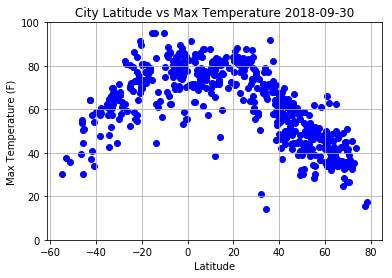

In [25]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Latitude"], weather_df["High Temp"], marker="o", color = 'blue')

# # Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature " + str(nowish))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.yticks(np.arange(0, 120, 20))
plt.grid(True)
#sns.set_style('darkgrid')

# # Save the figure
plt.savefig("LatitudeVsTemperature.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

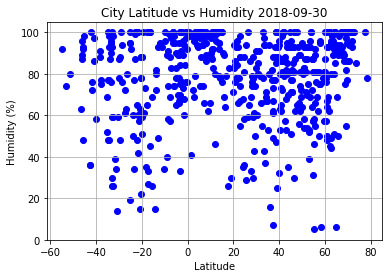

In [24]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], marker="o", color = 'blue')

# Incorporate other graph properties
plt.title("City Latitude vs Humidity " + str(nowish))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.yticks(np.arange(0, 120, 20))
plt.grid(True)

# Save the pltfig
plt.savefig("LatitudeVsHumidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

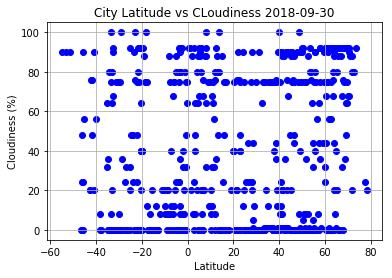

In [23]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Latitude"], weather_df["Clouds"], marker="o", color = 'blue')

# Incorporate other graph properties
plt.title("City Latitude vs CLoudiness " + str(nowish))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.yticks(np.arange(0, 120, 20))
plt.grid(True)

# Save the pltfig
plt.savefig("LatitudeVsClouds.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

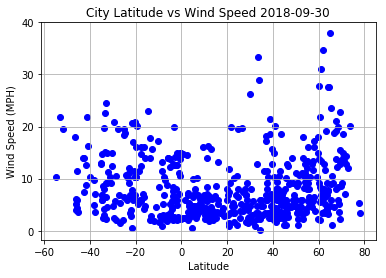

In [26]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"], marker="o", color = 'blue')

# Incorporate other graph properties
plt.title("City Latitude vs Wind Speed " + str(nowish))
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.yticks(np.arange(0, 50, 10))
plt.grid(True)

# Save the pltfig
plt.savefig("LatitudeVsWindSpeed.png")

# Show plot
plt.show()

In [ ]:
There are more cities located geographically north of the Equator in the sample, but generally speaking the
further from the Equator, the colder it gets, while it's hotter near the equator. Humidity also rises the 
further you get from the Equator but the trend isn't as clear. Cloud coverage is fairly evenly spread across
the globe. Wind increases more significantly at the latitudinal extremes. 